In [2]:
from evaluate_performance import Evaluate
import pickle

sens_base32, spec_base32 = Evaluate.sens_spec_range(file_name = 'rs_tf_dx')
# sens_base1536, spec_base1536 = Evaluate.sens_spec_range(file_name = 'rs_tf1536_dx')
# sens_gnn, spec_gnn = Evaluate.sens_spec_range(file_name = 'rs_gnn128_dx')
# sens_gpt1536, spec_gpt1536 = Evaluate.sens_spec_range(file_name = 'rs_tf_gpt1536_dx')
sens_mistral, spec_mistral = Evaluate.sens_spec_range(file_name = 'rs_tf_mistral4096_dx')
with open('output/tf_gpt1536_sens.pickle', 'rb') as handle:
    sens_gpt1536 = pickle.load(handle)
    
with open('output/tf_dx1536_sens.pickle', 'rb') as handle:
    sens_b1536 = pickle.load(handle)

with open('output/tf_gnn128_sens.pickle', 'rb') as handle:
    sens_gnn128 = pickle.load(handle)

100%|██████████| 200/200 [00:00<00:00, 769.17it/s]


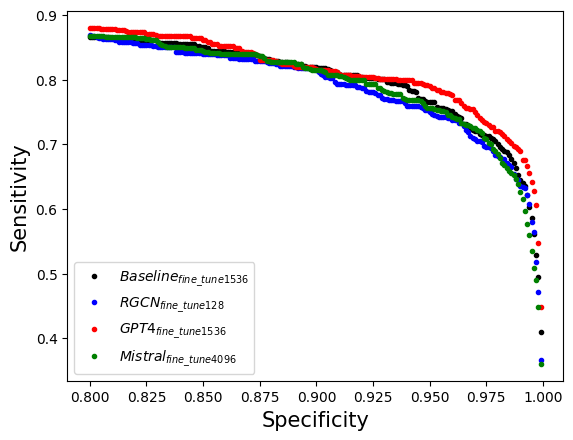

In [6]:
import matplotlib.pyplot as plt
import numpy as np
def plot_sen_spec(test, color, month = '3m', smoothing = False):
    
    spec, sens = [], []
    for k, v in test.items():
        spec.append(k)
        sens.append(v[month])
    plt.plot(spec, sens, '.', color = color[0])
    if smoothing:
        # Fit a polynomial of degree 3 to the data
        coefficients = np.polyfit(spec, sens, 2)
        polynomial = np.poly1d(coefficients)

        # Generate x values for plotting the polynomial
        x_smooth = np.linspace(spec.min(), spec.max(), 500)
        y_smooth = polynomial(x_smooth)
        plt.plot(x_smooth, y_smooth, color=color[1])   

# plot_sen_spec(sens_base32, ['purple','gray'], month = '3m')
plot_sen_spec(sens_b1536, ['k','gray'], month = '3m')
plot_sen_spec(sens_gnn128, ['b','c'], month = '3m')
plot_sen_spec(sens_gpt1536, ['r','m'], month = '3m')
plot_sen_spec(sens_mistral, ['g', 'olive'], month = '3m')
plt.xlabel('Specificity', fontsize = 15)
plt.ylabel('Sensitivity', fontsize = 15)    
plt.legend(labels = [ 
                     '$Baseline_{\t{fine\_tune1536}}$',
                     '$RGCN_{\t{fine\_tune128}}$', 
                     '$GPT4_{\t{fine\_tune1536}}$',
                     '$Mistral_{\t{fine\_tune4096}}$'],)
plt.show()

In [8]:
res

<bound method Evaluate.raw_scores of <evaluate_performance.Evaluate object at 0x000002B95A047610>>